## Librerias

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## EDA

In [2]:
url = 'https://raw.githubusercontent.com/ronalcabrera/PG_Olist/main/Datasets/olist_sellers_dataset.csv'
sellers = pd.read_csv(url, delimiter=',', encoding='UTF-8')

Verifico integridad de los datos en sellers

In [3]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


No hay nulos

In [6]:
sellers

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP
...,...,...,...,...
3090,98dddbc4601dd4443ca174359b237166,87111,sarandi,PR
3091,f8201cab383e484733266d1906e2fdfa,88137,palhoca,SC
3092,74871d19219c7d518d0090283e03c137,4650,sao paulo,SP
3093,e603cf3fec55f8697c9059638d6c8eb5,96080,pelotas,RS


In [10]:
print(sellers.seller_city.unique())

['campinas' 'mogi guacu' 'rio de janeiro' 'sao paulo' 'braganca paulista'
 'brejao' 'penapolis' 'curitiba' 'anapolis' 'itirapina' 'tubarao'
 'lauro de freitas' 'imbituba' 'brasilia' 'porto seguro' 'guaruja'
 'tabatinga' 'salto' 'tres de maio' 'belo horizonte' 'arapongas'
 'sao bernardo do campo' 'tatui' 'garopaba' 'camanducaia' 'tupa'
 'guarulhos' 'sao jose dos pinhais' 'sao ludgero' 'sao jose' 'piracicaba'
 'porto alegre' 'congonhal' 'santo andre' 'osasco' 'valinhos' 'joinville'
 'saquarema' 'barra velha' 'petropolis' 'santo antonio da patrulha'
 'ponta grossa' 'santana de parnaiba' 'sao carlos' 'ibitinga' 'barueri'
 'caxias do sul' 'araguari' 'contagem' 'jaragua do sul' 'lages - sc'
 'bento goncalves' 'catanduva' 'ribeirao pires' 'jaboticabal' 'echapora'
 'cotia' 'rio do sul' 'sorocaba' 'pradopolis' 'itaborai' 'mirassol'
 'birigui' 'assis' 'jaguariuna' 'araraquara' 'macae' 'rio claro'
 'londrina' 'ribeirao preto' 'tres coracoes' 'nhandeara' 'orleans'
 'cuiaba' 'formosa do oeste' 'san

Normalizar estados y ciudades en una tabla maestro, por ejemplo:<br>
• /sp = Sao Paulo, sao paulo / sao paulo<br>
• - sc = Santa Catarina<br>
entre otros

In [16]:
print(sellers.seller_state.unique())
print('Hay',np.count_nonzero(sellers.seller_state.unique()), 'estados')

['SP' 'RJ' 'PE' 'PR' 'GO' 'SC' 'BA' 'DF' 'RS' 'MG' 'RN' 'MT' 'CE' 'PB'
 'AC' 'ES' 'RO' 'PI' 'MS' 'SE' 'MA' 'AM' 'PA']
Hay 23 estados


En Brasil hay 27 estados, por lo que hay 4 estados en los cuales no hay vendedores, los localizo:

In [32]:
# Web scrapping
estados = pd.read_html('https://es.wikipedia.org/wiki/Unidad_federativa_de_Brasil#Lista_de_unidades_federativas_brasile%C3%B1as')

# Creo y limpio dataframe
estados = estados[0]
estados = estados[['Unidad federativa', 'Código ISO', 'Capital', 'Densidad(2021)']]
estados['Código ISO'] = estados['Código ISO'].str.replace('BR-','')

# Comparo con mis datos
lst = []
for i in range(len(estados['Código ISO'])):
    if not(estados['Código ISO'][i] in sellers.seller_state.unique()):
        lst.append(estados['Unidad federativa'][i])
print('No hay vendedores en las Unidades Federativas:', lst)

No hay vendedores en las Unidades Federativas: ['Alagoas', 'Amapá', 'Roraima', 'Tocantins']


Text(0, 0.5, 'Vendedores')

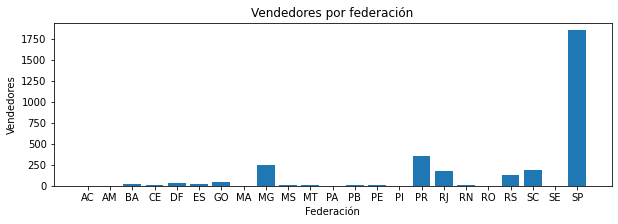

In [61]:
vendedores_por_federacion = sellers.groupby(['seller_state'])['seller_city'].agg('count').reset_index()
vendedores_por_federacion.rename(columns={'seller_city':'cant_vendedores'}, inplace=True)

# Grafico la cantidad de vendedores por federacion
plt.figure(figsize=(10,3))
plt.title('Vendedores por federación')
plt.bar(vendedores_por_federacion['seller_state'], vendedores_por_federacion['cant_vendedores'])
plt.xlabel('Federación')
plt.ylabel('Vendedores')

Se pueden apreciar que los vendedores se ubican principalmente en Sao Paulo, y luego se distribuyen entre otras 5 federaciones

In [12]:
sellers.seller_zip_code_prefix.unique()

array([13023, 13844, 20031, ...,  4650, 96080, 12051], dtype=int64)

Todo limpio.